In [7]:
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import BallTree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

In [8]:
class MachineLearning():

    def __init__(self):
        print("Loading dataset ...")
        self.flow_dataset = pd.read_csv('FlowStatsfile.csv')
        print("Dataset loaded successfully.")

        print("Cleaning dataset ...")
        # Example: Applying progress bar to a column processing loop
        for col in tqdm([2, 3, 5], desc="Cleaning columns"):
            self.flow_dataset.iloc[:, col] = self.flow_dataset.iloc[:, col].str.replace('.', '')
        print("Dataset cleaning complete.")
    
    def flow_training(self):
        print("Starting flow training ...")
        
        X_flow = self.flow_dataset.iloc[:, :-1].values
        X_flow = X_flow.astype('float64')

        y_flow = self.flow_dataset.iloc[:, -1].values
        print("Feature and target variables prepared.")

        print("Splitting dataset into training and test sets ...")
        X_flow_train, X_flow_test, y_flow_train, y_flow_test = train_test_split(X_flow, y_flow, test_size=0.25, random_state=0)
        print(f"Dataset split complete: {len(X_flow_train)} training samples, {len(X_flow_test)} test samples.")
        
        print("Training the KNN classifier ...")
        classifier = KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', n_jobs=-1)

        # Training the model
        for _ in tqdm(range(1), desc="Training model"):  # This will track one "epoch", since training is instant in KNN
            flow_model = classifier.fit(X_flow_train, y_flow_train)
        print("Model training complete.")
        
        print("Making predictions on the test set ...")
        y_flow_pred = flow_model.predict(X_flow_test)
        print("Prediction complete.")
        
        print("------------------------------------------------------------------------------")
        print("Confusion Matrix:")
        cm = confusion_matrix(y_flow_test, y_flow_pred)
        print(cm)

        # Calculate accuracy, precision, recall, F1 score
        acc = accuracy_score(y_flow_test, y_flow_pred)
        precision = precision_score(y_flow_test, y_flow_pred, average='binary')
        recall = recall_score(y_flow_test, y_flow_pred, average='binary')
        f1 = f1_score(y_flow_test, y_flow_pred, average='binary')

        print(f"Accuracy = {acc*100:.2f} %")
        print(f"Precision = {precision*100:.2f} %")
        print(f"Recall = {recall*100:.2f} %")
        print(f"F1 Score = {f1*100:.2f} %")
        print("------------------------------------------------------------------------------")

        # Plot the confusion matrix
        x = ['TP', 'FP', 'FN', 'TN']
        plt.title("KNN Confusion Matrix")
        plt.xlabel('Class predict')
        plt.ylabel('Numbers of flows')
        plt.tight_layout()
        plt.style.use("ggplot")
        y = [cm[0][0], cm[0][1], cm[1][0], cm[1][1]]
        plt.bar(x, y, color="#000000", label='KNN')
        plt.legend()
        plt.show()


Loading dataset ...
Dataset loaded successfully.
Cleaning dataset ...


Cleaning columns: 100%|██████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.31it/s]


Dataset cleaning complete.
Starting flow training ...
Feature and target variables prepared.
Splitting dataset into training and test sets ...
Dataset split complete: 2000642 training samples, 666881 test samples.
Training the KNN classifier ...


Training model: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:25<00:00, 25.12s/it]


Model training complete.
Making predictions on the test set ...
Prediction complete.
------------------------------------------------------------------------------
Confusion Matrix:
[[226596      0]
 [     4 440281]]
Accuracy = 100.00 %
Precision = 100.00 %
Recall = 100.00 %
F1 Score = 100.00 %
------------------------------------------------------------------------------


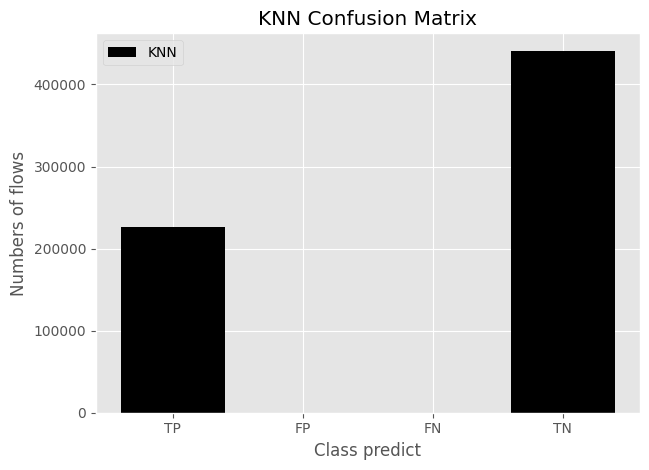

Training time:  0:01:42.207216


In [9]:
def main():
    start = datetime.now()
    
    ml = MachineLearning()
    ml.flow_training()

    end = datetime.now()
    print("Training time: ", (end-start)) 

if __name__ == "__main__":
    main()